# Networkx and Altair

In [5]:
%matplotlib inline
import numpy as np
import networkx as nx
import altair as alt
import nx_altair as nxa
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Create a random network

Let's just create a random network.

In [6]:
# Generate a random graph
G = nx.fast_gnp_random_graph(n=30, p=0.25)

# Compute positions for viz.
pos = nx.spring_layout(G)

# Add attributes to each node.
for n in G.nodes():
    G.nodes[n]['weight'] = np.random.randn()
    G.nodes[n]['name'] = np.random.randint(1000)
    G.nodes[n]['viable'] = np.random.choice(['yes', 'no'])
    

# Add attributes to edge.    
for e in G.edges():
    G.edges[(e[0],e[1])]['weight'] = np.random.uniform(1, 10)

## Drawing the graph.

Let's draw the graph using NetworkX.


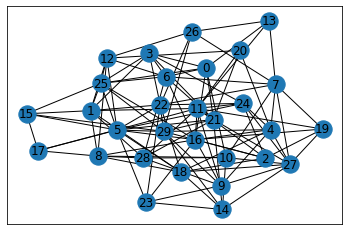

In [7]:
nx.draw_networkx(
    G=G,
    pos=pos,
)

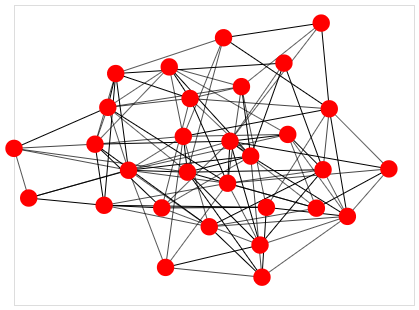

In [8]:
nxa.draw_networkx(
    G=G,
    pos=pos,
)

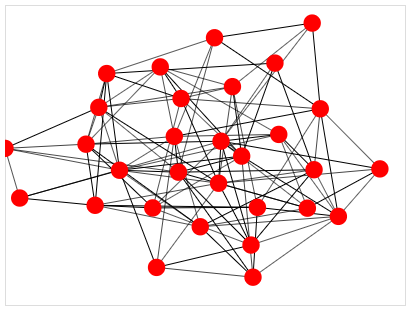

In [9]:
nxa.draw_networkx(
    G=G,
    pos=pos,
    node_tooltip=['name', 'weight', 'viable']
).interactive()

# Leveraging Altair

In [10]:
chart = nxa.draw_networkx(
    G=G,
    pos=pos,
    node_size=200,
    node_color='viable',
    cmap='viridis',
    width='weight',
    node_tooltip=['weight', 'name', 'viable']
)

Let's add some advanced exploration features using Altair.

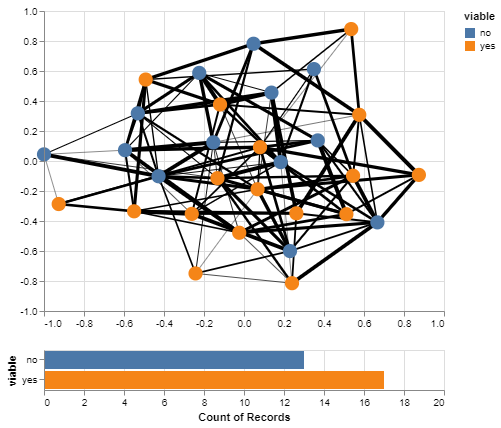

In [11]:

# Get the node layer
edges = chart.layer[0]
nodes = chart.layer[1]

# Build a brush
brush = alt.selection_interval(encodings=['x', 'y'])
color = alt.Color('viable:N',  legend=None)

# Condition nodes based on brush
nodes = nodes.encode(
    fill=alt.condition(brush, color, alt.value('gray')),
).add_selection(
    brush
)

# Create a bar graph to show highlighted nodes.
bars = alt.Chart(nodes.data).mark_bar().encode(
    x=alt.X('count()', scale=alt.Scale(domain=(0,20))),
    y='viable',
    color='viable',
).transform_filter(
    brush
)

alt.vconcat(edges+nodes, bars)

In [19]:
nodes = chart.layer[1]
nodes.data

,viable,name,x,y,weight
0,no,67,0.137249,0.455783,-0.697132
1,no,506,-0.594913,0.0721528,-0.997526
2,yes,295,0.511898,-0.354422,-1.55003
3,no,839,-0.223713,0.587369,-1.61185
4,yes,425,0.545274,-0.0981515,0.637297
5,no,732,-0.427303,-0.101648,0.258527
6,yes,445,-0.119791,0.376708,-0.0529882
7,yes,502,0.576372,0.307986,0.316583
8,yes,389,-0.549403,-0.335316,-0.252125
9,no,819,0.230059,-0.600326,-1.91577


IndexError: list index out of range